In [1]:
import pandas as pd
import numpy as np

In [ ]:
control_group_data = pd.read_csv("a_b_testing/control_group.csv", sep=';')

control_group_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_group_data = pd.read_csv("a_b_testing/test_group.csv", sep=';')

test_group_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [ ]:
control_group_data.isnull().sum()

test_group_data.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

In [ ]:
control_group_data.duplicated().sum()

test_group_data.duplicated().sum()

0

In [ ]:
len(control_group_data)

len(test_group_data)

30

In [ ]:
control_group_data['group'] = 'control'

test_group_data['group'] = 'test'

In [24]:
combined_data = pd.concat([control_group_data, test_group_data], ignore_index=True)

combined_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,group
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,control
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,control
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,control
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,control
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,control


In [25]:
combined_data['group'].value_counts()

group
control    30
test       30
Name: count, dtype: int64

In [27]:
combined_data['converted'] = combined_data['# of Purchase'].apply(lambda x: 1 if x>0 else 0)

In [28]:
combined_data['converted'].value_counts()

converted
1    59
0     1
Name: count, dtype: int64

In [29]:
conversion_rate = combined_data.groupby('group')['converted'].mean()

conversion_rate

group
control    0.966667
test       1.000000
Name: converted, dtype: float64

C:\Users\wajah\AppData\Local\Temp\ipykernel_27460\2709854480.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate.index, y=conversion_rate.values, palette='viridis')


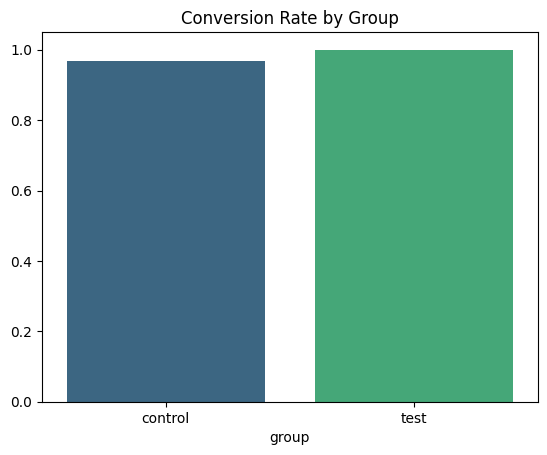

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=conversion_rate.index, y=conversion_rate.values, palette='viridis')

plt.title('Conversion Rate by Group')

plt.show()

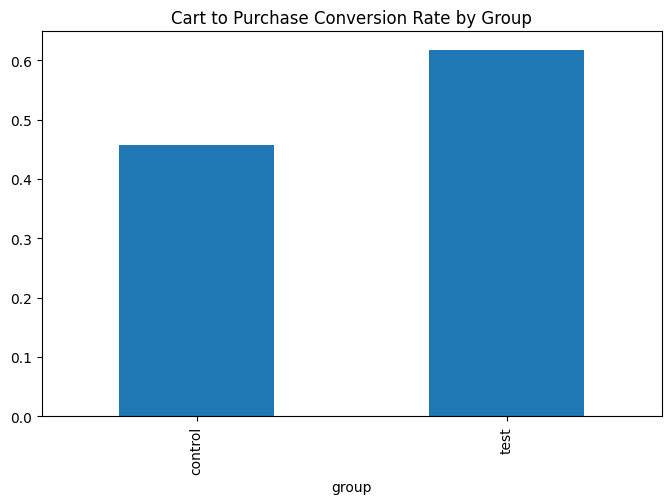

In [ ]:
combined_data['cart_to_purchase_conversion'] = combined_data['# of Purchase'] / combined_data['# of Add to Cart']

combined_data.groupby('group')['cart_to_purchase_conversion'].mean().plot(kind="bar", figsize=(8, 5))

plt.title('Cart to Purchase Conversion Rate by Group')

plt.show()

C:\Users\wajah\AppData\Local\Temp\ipykernel_27460\3016957691.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y="# of Purchase", data=combined_data, palette='viridis')


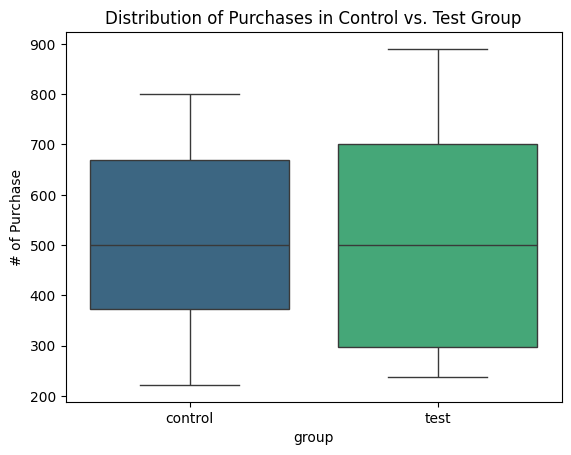

In [ ]:
sns.boxplot(x="group", y="# of Purchase", data=combined_data, palette='viridis')
plt.title("Distribution of Purchases in Control vs. Test Group")

plt.show()

<Axes: >

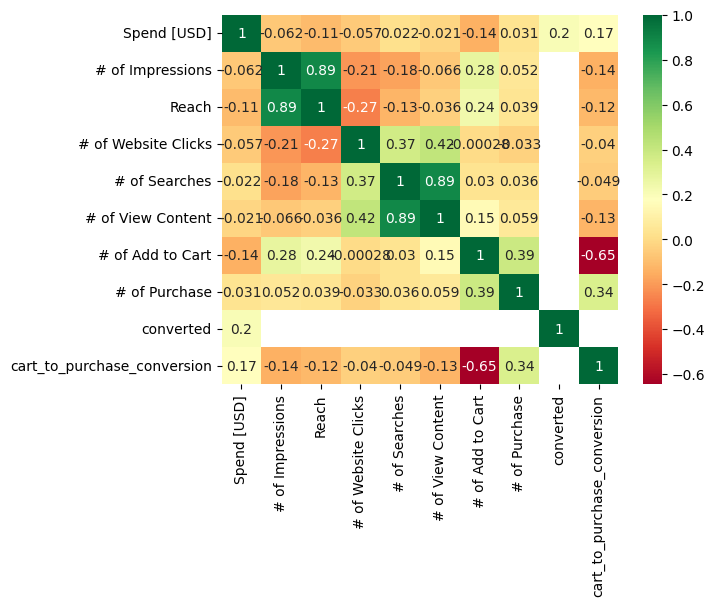

In [75]:
corrs = combined_data.select_dtypes(include=np.number).corr()

sns.heatmap(corrs, annot=True, cmap='RdYlGn')

<Axes: xlabel='metric', ylabel='mean'>

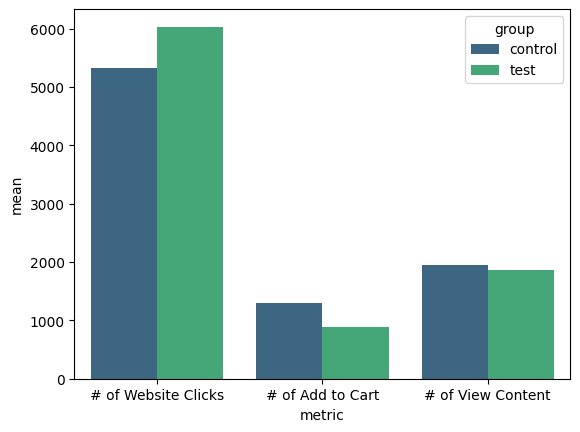

In [76]:
metrics = ['# of Website Clicks', '# of Add to Cart', '# of View Content']

dive_metrics = combined_data.groupby('group')[metrics].mean().reset_index()

dive_metrics_melted = dive_metrics.melt(id_vars='group', var_name='metric', value_name='mean')

sns.barplot(data=dive_metrics_melted, x='metric', y='mean', hue='group', palette='viridis')

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

control_conversions = combined_data[combined_data['group']=='control']['converted'].sum()
test_conversions = combined_data[combined_data['group']=='test']['converted'].sum()

control_total = combined_data[combined_data['group']=='control'].shape[0]
test_total = combined_data[combined_data['group']=='test'].shape[0]

nobs = [control_total, test_total]
count = [control_conversions, test_conversions]

z_test, p_value = proportions_ztest(count , nobs, alternative = 'two-sided')

print(f"z-statistics: {z_test}")
print(f"p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
     print("Reject the null hypothesis: There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference found.")

z-statistics: -1.0084389681792196
p-value: 0.3132437734013086
Fail to reject the null hypothesis: No significant difference found.


In [ ]:
from scipy.stats import ttest_ind

control_purchases = combined_data[combined_data['group'] == 'control']['converted']
test_purchases = combined_data[combined_data['group'] == 'test']['converted']

t_stat, p_value = ttest_ind(control_purchases, test_purchases, equal_var=False)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference found.")

T-Statistic: -1.0
P-Value: 0.32558198801619365
Fail to reject the null hypothesis: No significant difference found.


c:\Users\wajah\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
